# Chapter 16 
 Machine Learning for Business Analytics<br>
Concepts, Techniques, and Applications in Python<br>
by Galit Shmueli, Peter C. Bruce, Peter Gedeck, Nitin R. Patel

Publisher: Wiley; 2nd edition (2024) <br>
<!-- ISBN-13: 978-3031075650 -->

(c) 2024 Galit Shmueli, Peter C. Bruce, Peter Gedeck, Nitin R. Patel

The code needs to be executed in sequence.

Python packages and Python itself change over time. This can cause warnings or errors.
"Warnings" are for information only and can usually be ignored.
"Errors" will stop execution and need to be fixed in order to get results.

If you come across an issue with the code, please follow these steps

- Check the repository (https://gedeck.github.io/sdsa-code-solutions/) to see if the code has been upgraded. This might solve the problem.
- Report the problem using the issue tracker at https://github.com/gedeck/sdsa-code-solutions/issues
- Paste the error message into Google and see if someone else already found a solution

In [2]:
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import pairwise
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates
from adjustText import adjust_text
import mlba
%matplotlib inline

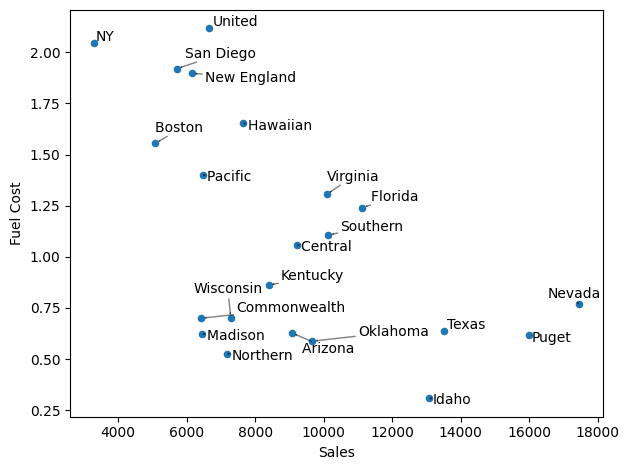

In [3]:
utilities_df = mlba.load_data('Utilities.csv')

ax = utilities_df.plot.scatter(x='Sales', y='Fuel_Cost')
texts = []
for k, row in utilities_df.iterrows():
    texts.append(ax.text(row.Sales, row.Fuel_Cost, row.Company))
adjust_text(texts, arrowprops={'arrowstyle': '-|>', 'alpha': 0.5})
ax.set_xlabel('Sales')
ax.set_ylabel('Fuel Cost')
plt.tight_layout()
plt.show()

In [4]:
utilities_df = mlba.load_data('Utilities.csv')

# set row names to the utilities column
utilities_df = utilities_df.set_index('Company')

# compute Euclidean distance
d = pairwise.pairwise_distances(utilities_df, metric='euclidean')
pd.DataFrame(d, columns=utilities_df.index, index=utilities_df.index)

Company,Arizona,Boston,Central,Commonwealth,NY,Florida,Hawaiian,Idaho,Kentucky,Madison,...,Northern,Oklahoma,Pacific,Puget,San Diego,Southern,Texas,Wisconsin,United,Virginia
Company,,,,,,,,,,,,,,,,,,,,,
Arizona,0.000000,3989.408076,140.402855,2654.277632,5777.167672,2050.529440,1435.265019,4006.104187,671.276346,2622.699002,...,1899.279821,598.556633,2609.045363,6914.742065,3363.061626,1063.009074,4430.251585,1790.485648,2427.588875,1016.617691
Boston,3989.408076,0.000000,4125.044132,1335.466502,1788.068027,6039.689076,2554.287162,7994.155985,3318.276558,1367.090634,...,2091.160485,4586.302564,1380.749962,10903.146464,629.760748,5052.331669,8419.610541,2199.721665,1562.210811,5005.081262
Central,140.402855,4125.044132,0.000000,2789.759674,5912.552908,1915.155154,1571.295401,3872.257626,807.920792,2758.559663,...,2035.441520,461.341670,2744.502847,6780.430307,3498.113013,928.749249,4295.014690,1925.772564,2563.637362,883.535455
Commonwealth,2654.277632,1335.466502,2789.759674,0.000000,3123.153215,4704.363099,1219.560005,6659.534567,1983.314354,43.648894,...,756.831954,3250.984589,56.644626,9568.434429,710.292965,3717.202963,7084.372839,864.273153,232.476871,3670.018191
NY,5777.167672,1788.068027,5912.552908,3123.153215,0.000000,7827.429211,4342.093798,9782.158178,5106.094153,3155.095594,...,3879.167462,6373.743249,3168.177463,12691.155108,2414.698757,6840.150291,10207.392630,3987.335962,3350.073118,6793.035300
Florida,2050.529440,6039.689076,1915.155154,4704.363099,7827.429211,0.000000,3485.671562,1959.731080,2721.706296,4672.829286,...,3949.092316,1454.292604,4659.356262,4866.111649,5413.093004,988.044559,2380.124974,3840.227943,4478.028874,1035.981475
Hawaiian,1435.265019,2554.287162,1571.295401,1219.560005,4342.093798,3485.671562,0.000000,5440.461781,764.083188,1187.941143,...,466.559118,2032.614245,1174.075616,8349.366438,1928.441480,2498.149024,5865.447190,358.476293,992.453252,2451.185161
Idaho,4006.104187,7994.155985,3872.257626,6659.534567,9782.158178,1959.731080,5440.461781,0.000000,4676.638384,6627.291780,...,5903.395450,3412.263965,6614.499239,2909.014679,7368.815437,2943.535570,447.828673,5795.958815,6432.132202,2989.963982
Kentucky,671.276346,3318.276558,807.920792,1983.314354,5106.094153,2721.706296,764.083188,4676.638384,0.000000,1951.628580,...,1228.436327,1269.102099,1938.026557,7585.467294,2692.212361,1734.103297,5101.414140,1119.940014,1756.378966,1687.236030


In [5]:
# scikit-learn uses population standard deviation
utilities_df_norm = utilities_df.apply(preprocessing.scale, axis=0)

# pandas uses sample standard deviation
utilities_df_norm = (utilities_df - utilities_df.mean())/utilities_df.std()

# compute normalized distance based on Sales and Fuel Cost
utilities_df_norm[['Sales', 'Fuel_Cost']]
d_norm = pairwise.pairwise_distances(utilities_df_norm[['Sales', 'Fuel_Cost']],
                                     metric='euclidean')
pd.DataFrame(d_norm, columns=utilities_df.index, index=utilities_df.index)

Company,Arizona,Boston,Central,Commonwealth,NY,Florida,Hawaiian,Idaho,Kentucky,Madison,...,Northern,Oklahoma,Pacific,Puget,San Diego,Southern,Texas,Wisconsin,United,Virginia
Company,,,,,,,,,,,,,,,,,,,,,
Arizona,0.000000,2.010329,0.774179,0.758738,3.021907,1.244422,1.885248,1.265638,0.461292,0.738650,...,0.564657,0.182648,1.570780,1.947668,2.509043,0.913621,1.247976,0.521491,2.761745,1.252350
Boston,2.010329,0.000000,1.465703,1.582821,1.013370,1.792397,0.740283,3.176654,1.557738,1.719632,...,1.940166,2.166078,0.478334,3.501390,0.679634,1.634425,2.890560,1.654255,1.100595,1.479261
Central,0.774179,1.465703,0.000000,1.015710,2.432528,0.631892,1.156092,1.732777,0.419254,1.102287,...,1.113433,0.855093,0.987772,2.065643,1.836762,0.276440,1.428159,0.838967,2.034824,0.510365
Commonwealth,0.758738,1.582821,1.015710,0.000000,2.571969,1.643857,1.746027,2.003230,0.629994,0.138758,...,0.377004,0.937389,1.258835,2.699060,2.202930,1.278514,1.998818,0.243408,2.547116,1.502093
NY,3.021907,1.013370,2.432528,2.571969,0.000000,2.635573,1.411695,4.162561,2.566439,2.705445,...,2.938637,3.174588,1.462019,4.397433,0.715629,2.558409,3.831132,2.661786,0.952507,2.328691
Florida,1.244422,1.792397,0.631892,1.643857,2.635573,0.000000,1.228805,1.764123,1.025663,1.722510,...,1.698624,1.243634,1.343185,1.767581,1.953423,0.366744,1.277920,1.452417,2.016493,0.313847
Hawaiian,1.885248,0.740283,1.156092,1.746027,1.411695,1.228805,0.000000,2.860189,1.436822,1.880361,...,2.027224,1.997036,0.560997,2.995848,0.726095,1.205034,2.463227,1.711256,0.879934,0.929414
Idaho,1.265638,3.176654,1.732777,2.003230,4.162561,1.764123,2.860189,0.000000,1.650417,1.950296,...,1.708409,1.083449,2.705579,0.992092,3.563727,1.658671,0.600089,1.778813,3.720421,1.980715
Kentucky,0.461292,1.557738,0.419254,0.629994,2.566439,1.025663,1.436822,1.650417,0.000000,0.697674,...,0.694524,0.608401,1.110854,2.180496,2.048098,0.658996,1.493274,0.426780,2.308613,0.929141


 Partial output

In [6]:
def plot_dendrogram(data, method, color_threshold):
    # in linkage() set argument method =
    # 'single', 'complete', 'average', 'weighted', centroid', 'median', 'ward'
    Z = linkage(data, method=method)
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_title(f'Hierarchical Clustering Dendrogram ({method} linkage)', loc='left')
    ax.set_xlabel('Company')
    dendrogram(Z, labels=data.index, color_threshold=color_threshold, ax=ax)
    ax.axhline(y=color_threshold, color='black', linewidth=0.5, linestyle='dashed')

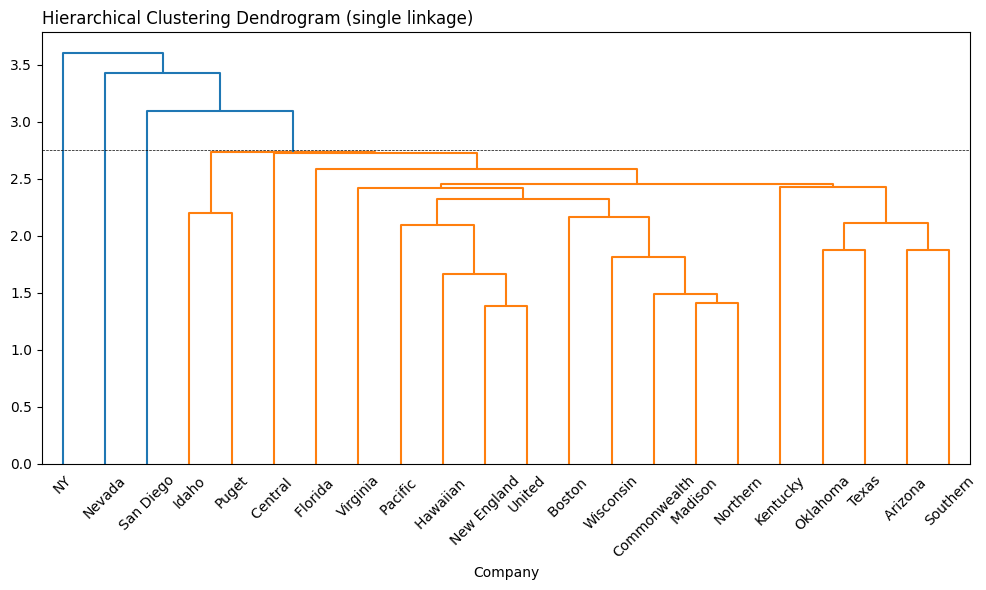

In [7]:
plot_dendrogram(utilities_df_norm, 'single', 2.75)
plt.tight_layout()
plt.show()

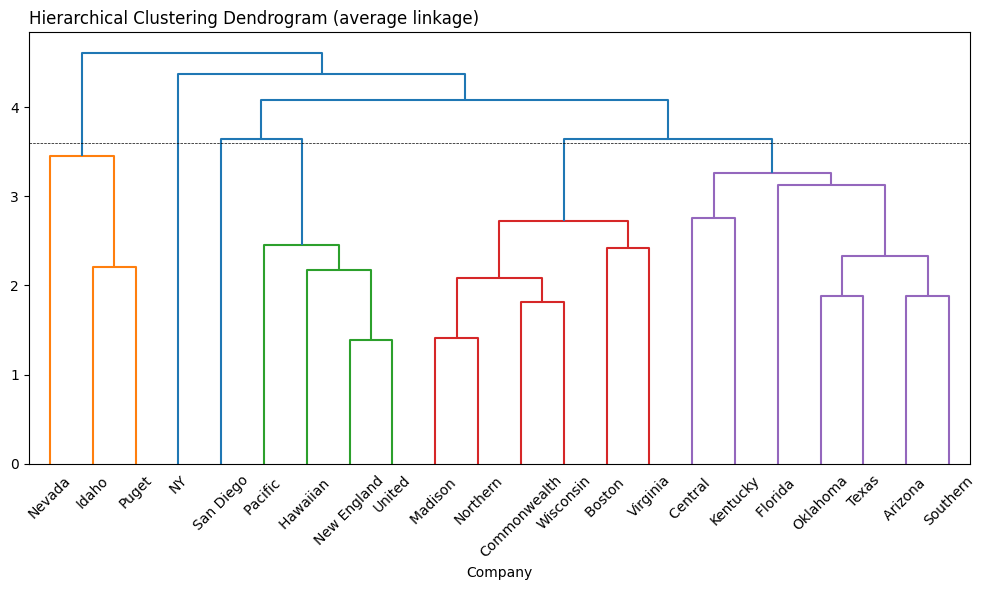

In [8]:
plot_dendrogram(utilities_df_norm, 'average', 3.6)
plt.tight_layout()
plt.show()

 Single Linkage (output modified for clarity)

In [9]:
memb = fcluster(linkage(utilities_df_norm, method='single'), 6, criterion='maxclust')
memb = pd.Series(memb, index=utilities_df_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

1 :  Idaho, Puget
2 :  Arizona , Boston , Commonwealth, Florida , Hawaiian , Kentucky, Madison , New England, Northern, Oklahoma, Pacific , Southern, Texas, Wisconsin, United, Virginia
3 :  Central 
4 :  San Diego
5 :  Nevada
6 :  NY


 Average Linkage (output modified for clarity)

In [10]:
memb = fcluster(linkage(utilities_df_norm, method='average'), 6, criterion='maxclust')
memb = pd.Series(memb, index=utilities_df_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

1 :  Idaho, Nevada, Puget
2 :  Hawaiian , New England, Pacific , United
3 :  San Diego
4 :  Boston , Commonwealth, Madison , Northern, Wisconsin, Virginia
5 :  Arizona , Central , Florida , Kentucky, Oklahoma, Southern, Texas
6 :  NY


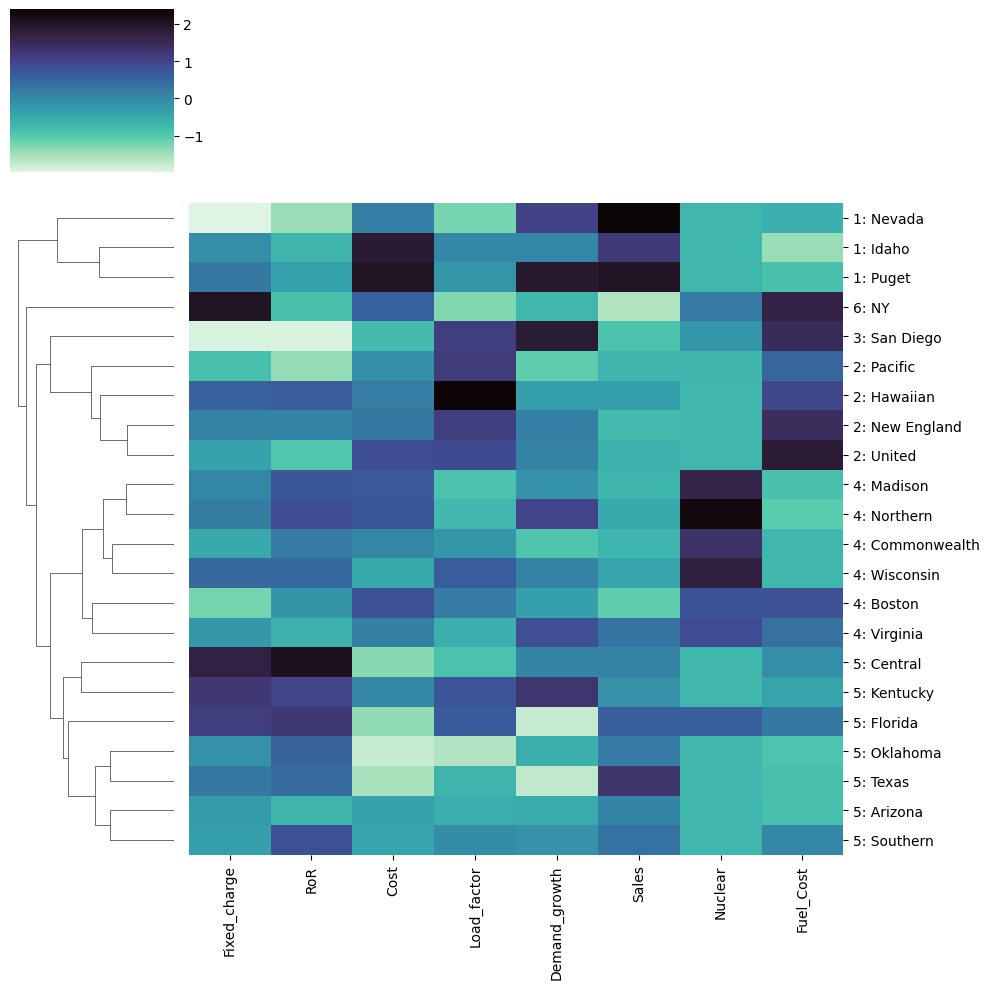

In [11]:
# set labels as cluster membership and utility name
utilities_df_norm.index = [f'{cluster}: {state}'
                           for cluster, state in zip(memb, utilities_df_norm.index)]
# plot heatmap
# the '_r' suffix reverses the color mapping to large = dark
sns.clustermap(utilities_df_norm, method='average', col_cluster=False, cmap='mako_r')
plt.tight_layout()
plt.show()

In [12]:
# Load and preprocess data
utilities_df = mlba.load_data('Utilities.csv')
utilities_df.set_index('Company', inplace=True)
utilities_df = utilities_df.apply(lambda x: x.astype('float64'))

# Normalize distances
utilities_df_norm = utilities_df.apply(preprocessing.scale, axis=0)

kmeans = KMeans(n_clusters=6, random_state=0).fit(utilities_df_norm)

# Cluster membership
memb = pd.Series(kmeans.labels_, index=utilities_df_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

0 :  Commonwealth, Madison , Northern, Wisconsin, Virginia
1 :  Pacific 
2 :  Arizona , Central , Florida , Oklahoma, Southern, Texas
3 :  Idaho, Nevada, Puget
4 :  Kentucky
5 :  Boston , NY, Hawaiian , New England, San Diego, United


 Centroids

In [13]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=utilities_df_norm.columns)
pd.set_option('display.precision', 3)
centroids

,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
0,-0.012,0.339,0.224,-0.366,0.170,-0.411,1.602,-0.609
1,-0.855,-1.431,-0.104,1.198,-1.097,-0.705,-0.677,0.547
2,0.393,0.759,-1.177,-0.534,-0.801,0.445,-0.503,-0.416
3,-0.614,-0.853,1.370,-0.492,1.015,1.900,-0.731,-0.988
4,1.253,1.032,-0.005,0.785,1.300,-0.146,-0.731,-0.443
5,-0.143,-0.549,0.323,0.755,0.118,-0.910,-0.232,1.401


 Within-cluster sum of squared distances and cluster count

In [14]:
# calculate the distances of each data point to the cluster centers
distances = kmeans.transform(utilities_df_norm)

# find closest cluster for each data point
minSquaredDistances = distances.min(axis=1) ** 2

# combine with cluster labels into a data frame
df = pd.DataFrame({'squaredDistance': minSquaredDistances, 'cluster': kmeans.labels_},
    index=utilities_df_norm.index)

# group by cluster and print information
for cluster, data in df.groupby('cluster'):
    count = len(data)
    withinClustSS = data.squaredDistance.sum()
    print(f'Cluster {cluster} ({count} members): {withinClustSS:.2f} within cluster ')

Cluster 0 (5 members): 10.66 within cluster 
Cluster 1 (1 members): 0.00 within cluster 
Cluster 2 (6 members): 20.28 within cluster 
Cluster 3 (3 members): 9.99 within cluster 
Cluster 4 (1 members): 0.00 within cluster 
Cluster 5 (6 members): 32.27 within cluster 


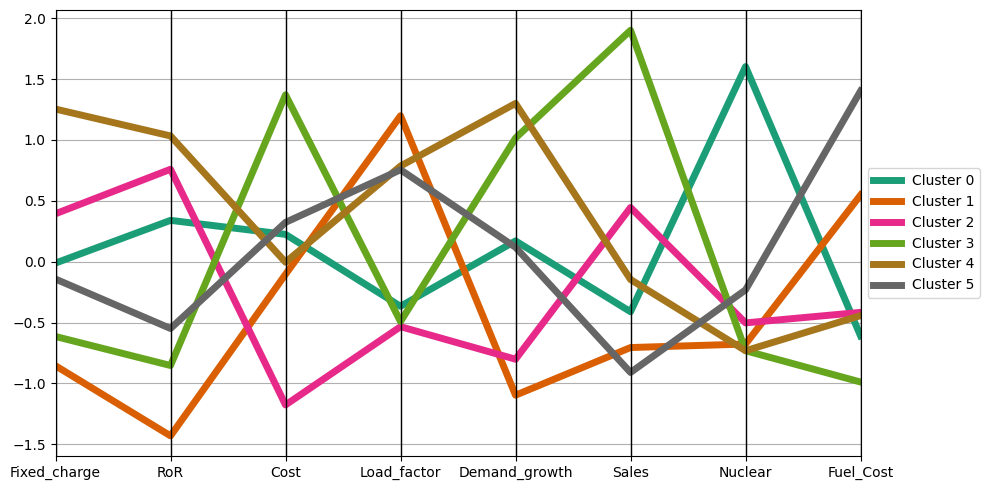

In [15]:
centroids['cluster'] = [f'Cluster {i}' for i in centroids.index]

plt.figure(figsize=(10,5))
parallel_coordinates(centroids, class_column='cluster', colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

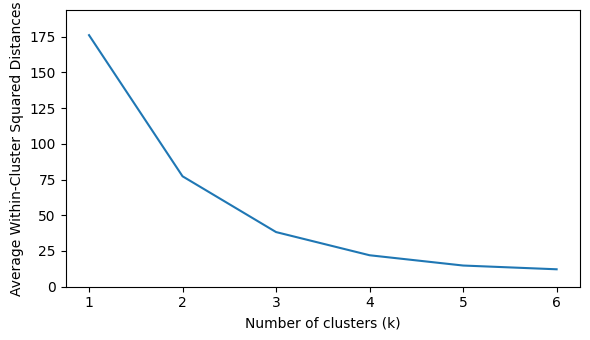

In [16]:
inertia = []
for n_clusters in range(1, 7):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(utilities_df_norm)
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(1, 7), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia', figsize=[6, 3.5])
ax.set_xlabel('Number of clusters (k)')
ax.set_ylabel('Average Within-Cluster Squared Distances')
ax.set_ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.tight_layout()
plt.show()

In [17]:
pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_, metric='euclidean'))

,0,1,2,3,4,5
0,0.000,3.824,2.911,3.842,3.206,3.119
1,3.824,0.000,3.587,4.362,4.210,2.027
2,2.911,3.587,0.000,3.987,2.957,3.459
3,3.842,4.362,3.987,0.000,3.890,4.199
4,3.206,4.210,2.957,3.890,0.000,3.192
5,3.119,2.027,3.459,4.199,3.192,0.000
